## **Imports and Setup**
We begin by importing necessary libraries including Qiskit for quantum computing and NumPy for matrix operations.

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

## **The Teleportation Circuit**
Now, we will create the circuit which teleports the qubit $Q$ to Bob's bit $B$ through entanglement of $B$ with Alice's bit $A$.

The circuit first initializes $(A,B)$ to be in a $|\phi^+\rangle$ state. Alice performs a controlled-NOT operation on the pair $(A,Q)$, with $Q$ being the control and $A$ being the target, and then performs a HAdamard operation on $Q$.

The, Alice measures both $A$ and $Q$, w.r.t. standard basis measurement and transmits the classical outcomes to Bob. If the measured value of $A$ is $1$, Bob performs an $X$ gate on $B$, and then, if the measured value of $Q$ is $1$, Bob performs a $Z$ gate on $B$.

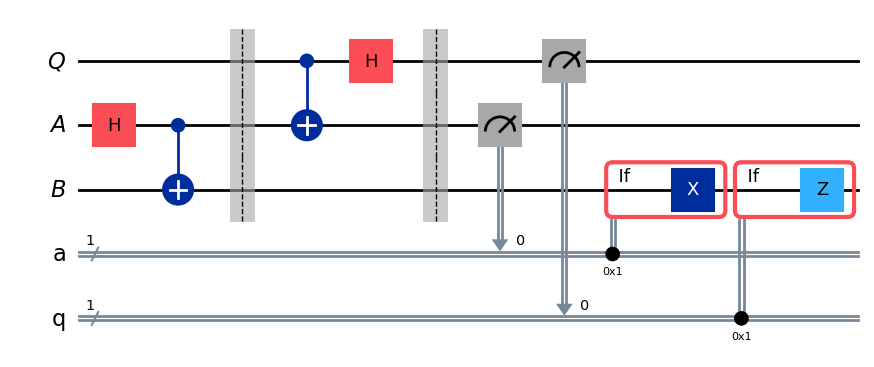

In [6]:
qubit= QuantumRegister(1, "Q")
e_0= QuantumRegister(1, "A")
e_1= QuantumRegister(1, "B")
a= ClassicalRegister(1, "a")
q= ClassicalRegister(1, "q")

circuit= QuantumCircuit(qubit, e_0, e_1, a, q)

circuit.h(e_0)
circuit.cx(e_0, e_1)
circuit.barrier()

circuit.cx(qubit, e_0)
circuit.h(qubit)
circuit.barrier()

circuit.measure(e_0, a)
circuit.measure(qubit, q)

with circuit.if_test((a,1)):
    circuit.x(e_1)
with circuit.if_test((q,1)):
    circuit.z(e_1)

display(circuit.draw(output="mpl"))

## **Testing the circuit**
To test our quantum teleportation circuit, we will create another circuit where a random unitary operation $U$ is applied to $Q$ before the teleportation protocol and its inverse, $U^{-1}$ is applied to $B$ after the protocol is over. If our protocl works correctly, the result of the measurement of $B$ at the end must be $0$, *always*.

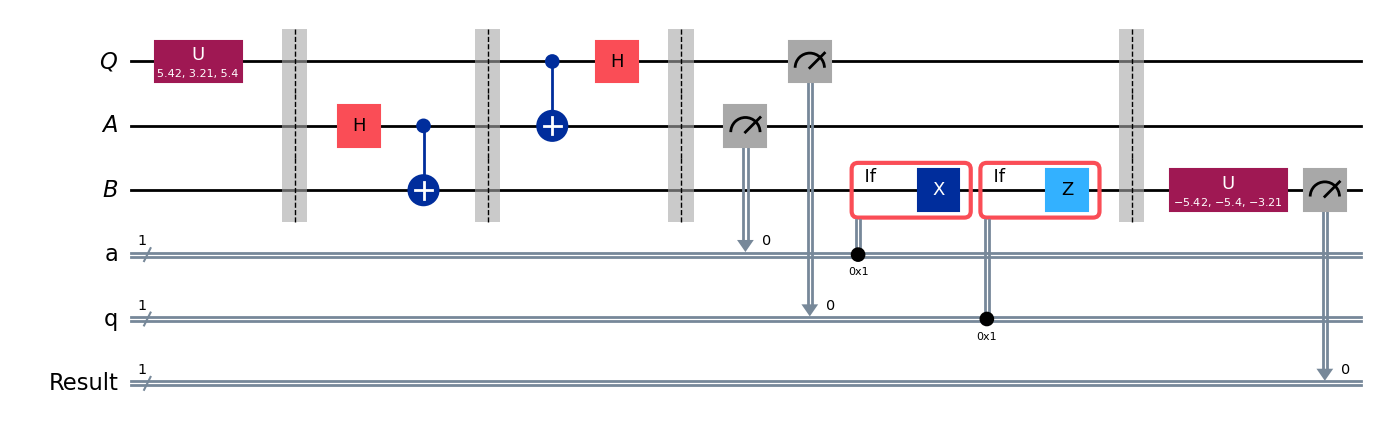

In [7]:
gate= UGate(theta= random.random()*2*pi, phi= random.random()*2*pi, lam= random.random()*2*pi)

result= ClassicalRegister(1, "Result")
test= QuantumCircuit(qubit, e_0, e_1, a, q, result)

test.append(gate, qubit)
test.barrier()

test= test.compose(circuit)
test.barrier()

test.append(gate.inverse(), e_1)
test.measure(e_1, result)

display(test.draw(output= "mpl"))

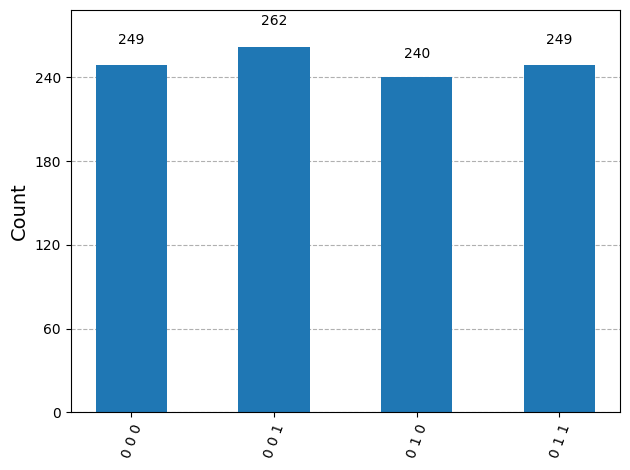

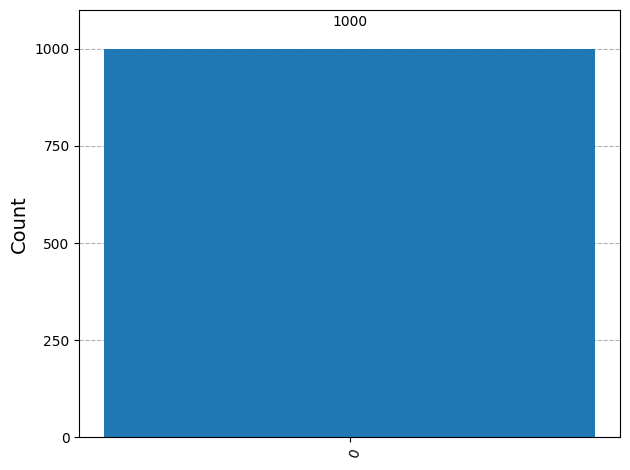

In [8]:
result= AerSimulator().run(test, shots= 1000).result()
statistics= result.get_counts()
display(plot_histogram(statistics))

filtered_statistics= marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

## **Result**

As the outcomes of our measurement suggest, the teleportation protocol flawlessly teleports $Q$ to $B$. However, it may be noted that this is different from cloning of the state of $Q$, since, at the end of the protocol, the state of $Q$ changes to some other state. Moreover, the state of $A$ changes at the end of this protocol too, and is no longer entangled with $B$.